In [21]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from collections import Counter
from xgboost import XGBClassifier
import lightgbm as lgb

# Fase 1

In [22]:
# Loading Dataset
df = pd.read_csv("/data/diabetes_binary_health_indicators_BRFSS2015.csv")

# Checking dimensions
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")

The dataset has 253680 rows and 22 columns


In [23]:
# Checking basic integrity and types
print("\n--- Dataframe Information ---")
df.info()


--- Dataframe Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth              

In [24]:
# Data sample
display(df.head())

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [25]:
# Checking basic statistics
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,253680.0,0.139333,0.346294,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


In [26]:
# Checking for duplicate rows
duplicated = df.duplicated().sum()
print(f"There are {duplicated} duplicated rows")

There are 24206 duplicated rows


In [27]:
# Checking the imbalance of our target variable
print("\nDistribution of the target variable (Diabetes_binary):")
print(df['Diabetes_binary'].value_counts(normalize=True) * 100)


Distribution of the target variable (Diabetes_binary):
Diabetes_binary
0.0    86.066698
1.0    13.933302
Name: proportion, dtype: float64


In [28]:
# Removing duplicated
df = df.drop_duplicates()

# Optimizing data types
cols_to_int = [
    'Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
    'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
    'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
    'Income'
]

# Converting to int8
df[cols_to_int] = df[cols_to_int].astype('int8')

# BMI and the mental/physical health columns can be int16
df[['BMI', 'MentHlth', 'PhysHlth']] = df[['BMI', 'MentHlth', 'PhysHlth']].astype('int16')

print(f"New shape after removing duplicates: {df.shape}")
print(f"Reduced memory usage for: {df.memory_usage().sum() / 1024**2:.2f} MB")

New shape after removing duplicates: (229474, 22)
Reduced memory usage for: 7.22 MB


/tmp/ipython-input-2816600153.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Diabetes_binary", y='BMI', ax=ax[2], palette='Set2')


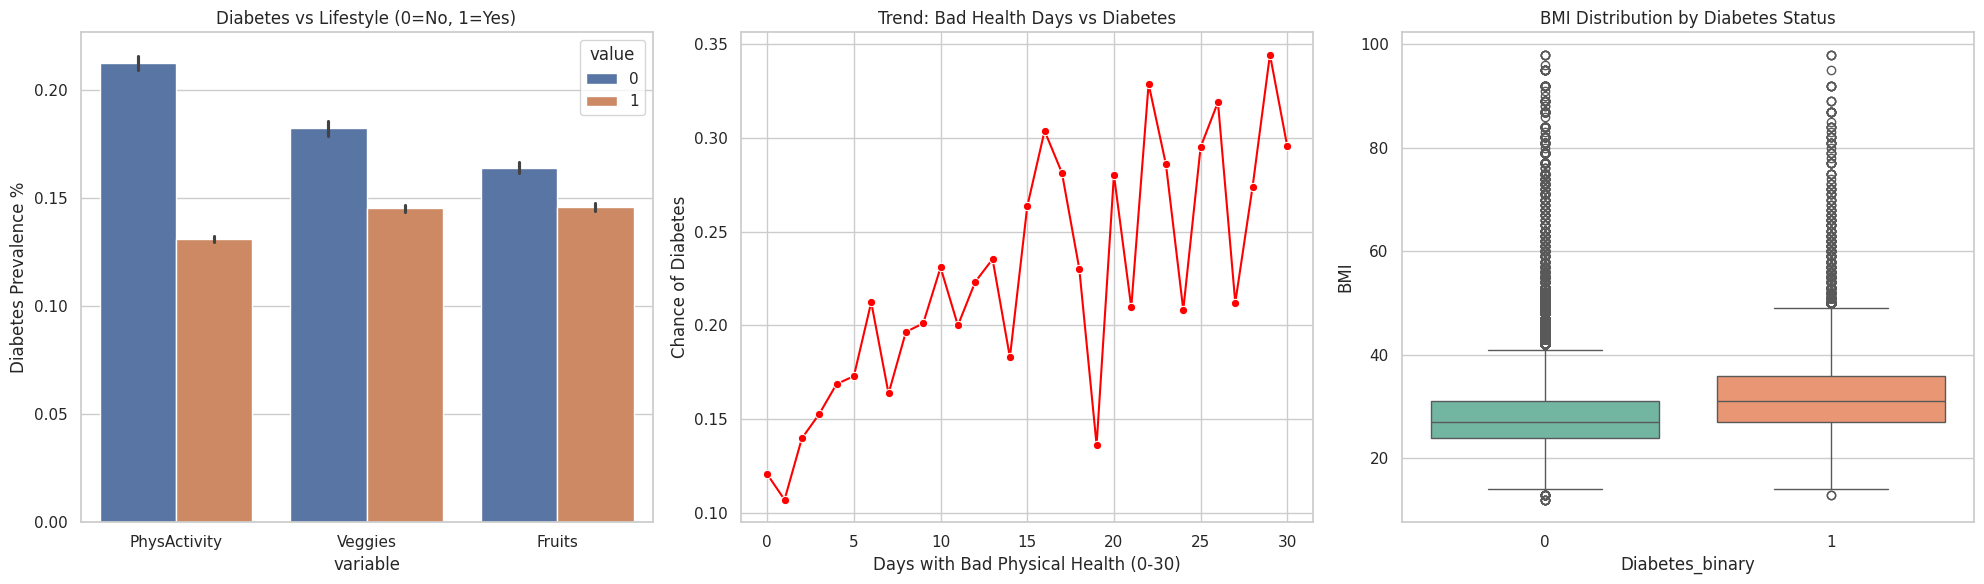

In [29]:
# Style settings
sns.set_theme(style="whitegrid")

# Creating a dashboard with 3 charts
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

#1. Relationship with lifestyle
lifestyle_cols = ['PhysActivity', 'Veggies', 'Fruits']
df_melted = df.melt(id_vars='Diabetes_binary', value_vars=lifestyle_cols)
sns.barplot(data=df_melted, x='variable', y='Diabetes_binary', hue='value', ax=ax[0])
ax[0].set_title('Diabetes vs Lifestyle (0=No, 1=Yes)')
ax[0].set_ylabel('Diabetes Prevalence %')

#2. Relationship with physical health
phys_health_trend = df.groupby("PhysHlth")["Diabetes_binary"].mean()
sns.lineplot(x=phys_health_trend.index, y=phys_health_trend.values, ax=ax[1], marker='o', color='red')
ax[1].set_title('Trend: Bad Health Days vs Diabetes')
ax[1].set_xlabel('Days with Bad Physical Health (0-30)')
ax[1].set_ylabel('Chance of Diabetes')

#3. Relationship with BMI
sns.boxplot(data=df, x="Diabetes_binary", y='BMI', ax=ax[2], palette='Set2')
ax[2].set_title('BMI Distribution by Diabetes Status')

plt.tight_layout()
plt.show()

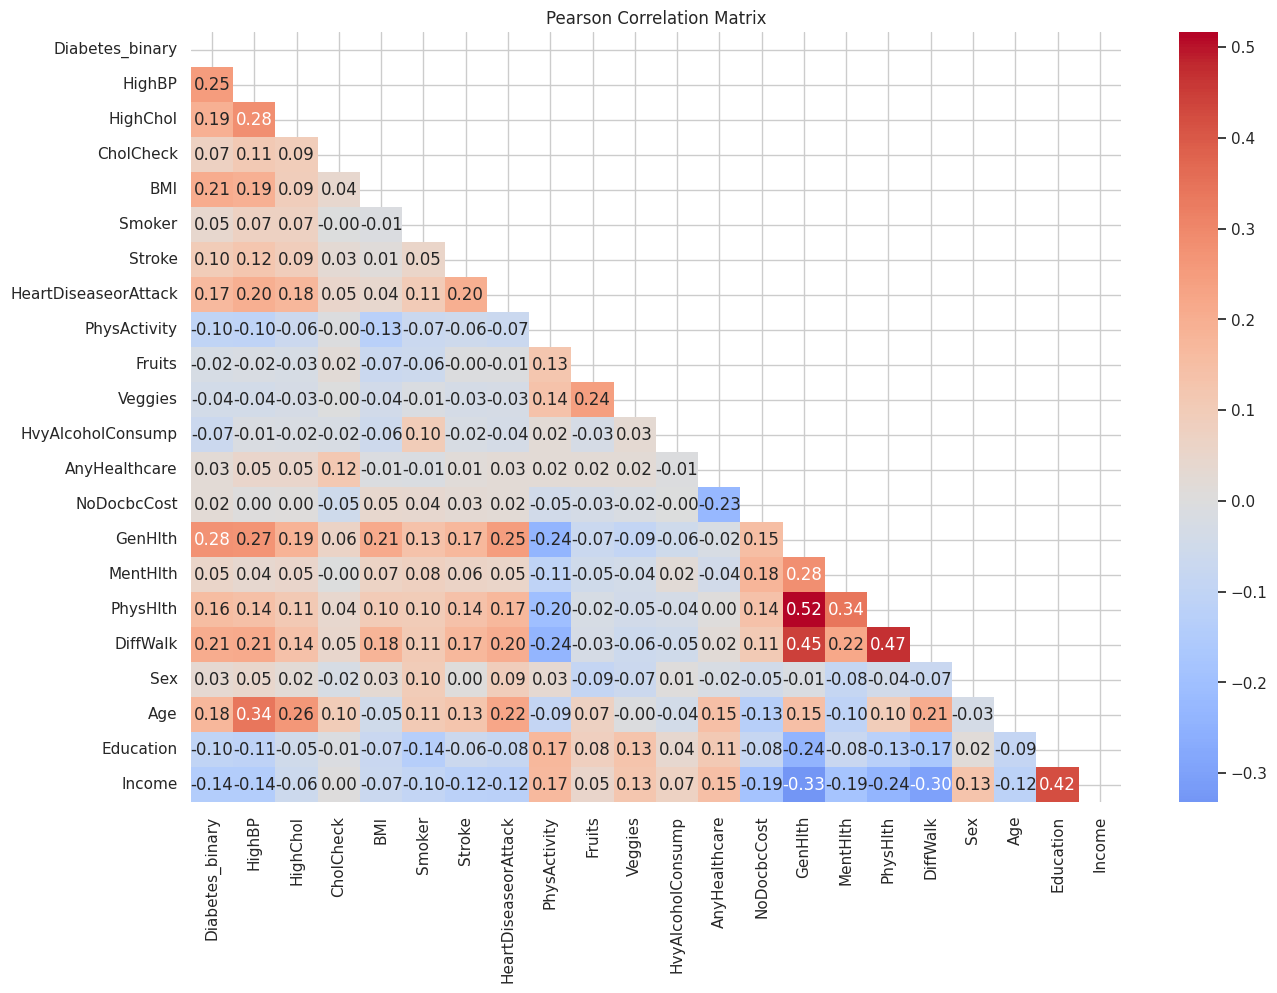

In [30]:
# Calculating correlation
corr = df.corr()

# Creating a mask to show only the lower triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(15, 10))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Pearson Correlation Matrix")
plt.show()

In [31]:
# 1. Applying suggested transformations
df_prep = df.copy()
df_prep['BMI'] = df_prep['BMI'].clip(upper=70) # Capping
df_prep['Difficult_Health'] = (df_prep['PhysHlth'] > 15).astype(int) # Your new feature

# 2. Separating Target and Predictors
X = df_prep.drop('Diabetes_binary', axis=1)
y = df_prep['Diabetes_binary']

# 3. Stratified Split (Ensures 14% diabetics in both sets)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Data prepared and scaled!")

✅ Data prepared and scaled!


O modelo abaixo não funcionou bem por conta de ter muitos "não diabeticos", por essa razão será testado o método SMOTE

Training the model (this might take a minute)...

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.86      0.97      0.91     38876
           1       0.46      0.15      0.22      7019

    accuracy                           0.84     45895
   macro avg       0.66      0.56      0.57     45895
weighted avg       0.80      0.84      0.81     45895



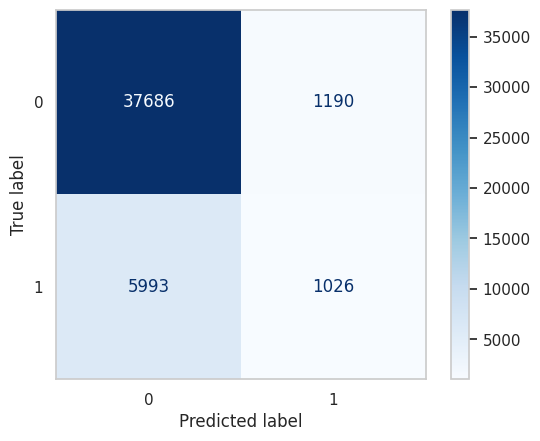

In [32]:
# Creating the model with Class Weights
# n_estimators=100 (100 trees), random_state for reproducibility
weights = {0:1, 1:8}
model_weights = RandomForestClassifier(n_estimators=100, class_weight=weights, random_state=42, n_jobs=-1)

# Training
print("Training the model (this might take a minute)...")
model_weights.fit(X_train_scaled, y_train)

# Predictions
y_pred = model_weights.predict(X_test_scaled)

# Evaluation
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model_weights, X_test_scaled, y_test, cmap='Blues')
plt.grid(False)
plt.show()

Criação do SMOTE

In [33]:
# 1. Creating the SMOTE balancer
sm = SMOTE(random_state=42)

# 2. Generating synthetic data (ONLY on Scaled Training)
X_res, y_res = sm.fit_resample(X_train_scaled, y_train)

print(f"Before SMOTE: {Counter(y_train)}")
print(f"After SMOTE: {Counter(y_res)}")

Before SMOTE: Counter({0: 155501, 1: 28078})
After SMOTE: Counter({0: 155501, 1: 155501})


In [34]:
# 3. Training a new model (this time without weights, as the data is already balanced)
model_smote = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model_smote.fit(X_res, y_res)

# 4. Prediction and Evaluation (Using the original X_test_scaled!)
y_pred_smote = model_smote.predict(X_test_scaled)

print("\n--- Classification Report with SMOTE ---")
print(classification_report(y_test, y_pred_smote))

KeyboardInterrupt: 

Fazendo teste com XGBoost para buscar maiores resultados

In [ ]:
# Calculating the ideal weight for XGBoost
# (Total negatives / Total positives)
ratio = (y_train == 0).sum() / (y_train == 1).sum()

# Creating the XGBoost model
xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    scale_pos_weight=ratio, # Aggressive automatic balancing
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_model.fit(X_train_scaled, y_train)

# Instead of just predicting 0 or 1, let's get the PROBABILITY
y_probs = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Applying a Custom Threshold of 0.3 (30%)
# If the chance is > 30%, we'll say it's diabetic
y_pred_custom = (y_probs > 0.3).astype(int)

print("\n--- XGBoost Report with Threshold of 0.3 ---")
print(classification_report(y_test, y_pred_custom))

In [ ]:
# Getting feature importances
importances = xgb_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Which factors does the model use most to detect Diabetes?')
plt.show()

Testando o LightGBM

In [ ]:
# Creating the LightGBM specific dataset (optional, but recommended)
# The is_unbalance=True parameter acts as the automatic class_weight
lgb_model = lgb.LGBMClassifier(
    n_estimators=500,
    learning_rate=0.05,
    is_unbalance=True, # Handles the 86/14 imbalance
    random_state=42,
    importance_type='gain' # Improves importance visualization
)

# Training
lgb_model.fit(X_train_scaled, y_train)

# Probability predictions
y_probs_lgb = lgb_model.predict_proba(X_test_scaled)[:, 1]

# Let's use the same 0.3 Threshold for a fair comparison with XGBoost
y_pred_lgb = (y_probs_lgb > 0.3).astype(int)

print("\n--- LightGBM Report (Threshold 0.3) ---")
print(classification_report(y_test, y_pred_lgb))

In [ ]:
!pip install shap

In [ ]:
import shap

# 1. Creating the explainer for XGBoost
explainer = shap.TreeExplainer(xgb_model)

# 2. Calculating SHAP values for a test sample (SHAP takes a while, so we take 500 samples)
X_test_sample = pd.DataFrame(X_test_scaled, columns=X.columns).sample(500, random_state=42)
shap_values = explainer.shap_values(X_test_sample)

# 3. Summary Plot
shap.summary_plot(shap_values, X_test_sample)